**BE Project:**
Testing Tokenizer. 

The model explained step by step. 

---


**Step 1**: Importing libraray
Pandas for reading the csv file.

BeautifulSoup is for striping the email from html tags.

Counter is used in bring the complete email into lower case.  

Tokenizer for preprocessing step.
Pad sequences for padding the email

In [1]:
import pandas as pd
import tensorflow as tf
from bs4 import BeautifulSoup
import string
import numpy as np

import tensorflow as tf

from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional


#from keras import plot_model


from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt


**Step 2**: 

Checking for the tensorflow version.

In [2]:
print(tf.__version__)

2.5.0


**Step 3:**

Checking GPU for our environment

In [3]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")
    
print( tf.test.gpu_device_name() )

Default GPU Device:/device:GPU:0
/device:GPU:0


**Step 4:**

Mounting our drive. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pwd

'/content'

**Step 5**:

 For preprocessing we are cleaning the data from unwanted and undesires elements. For that we have two functions:


1. *removeHTMLtags(param)*:  For removing html tags.
2. *to_lower(param)*: For making the complete email lowercase.
3. *remove_special_characters(param)*: removing punctuations, etc.

Function for striping ur email of HTML tags and Non alpha numberic or unwanted spaces. By doing so, we are preparing our data for a smooth tokenizer

In [6]:
def to_lower(word):
    result = word.lower()
    return result

def remove_special_characters(word):
    result=word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def removeHTMLtags(blob):
     soup = BeautifulSoup(blob,  "html.parser").text
     return soup


**Step 6**: Loading the dataset using *pandas* libraray.

.dropna() function is for dropping all the missing values if any. The parameters meaning: 

1. axis=0 if 0, or ‘index’ : Drop rows which contain missing values.
1, or ‘columns’ : Drop columns which contain missing value

2. how='any' : Determine if row or column is removed from DataFrame, when we have at least one NA

3. inplace=True: inplacebool, default False
If True, do operation inplace and return None.

In [7]:
path_csv="/content/drive/MyDrive/BE Project All Documents/code/Phishing-dataset-decoded.csv"

train_data= pd.read_csv(path_csv)
#train_data= pd.read_csv("/content/drive/MyDrive/BE Project All Documents/code/Phishing-dataset.csv")
print("Training dataset have been uploaded")
print(train_data.shape)
train_data.dropna(axis = 0, how ='any',inplace=True)

print('===========Train Data =========')
print(train_data['Class'].value_counts())
print(len(train_data))
max_len=len(train_data)
print("maxlen",max_len)
print('==============================\n\n')

train_data['Mail'] = train_data['Mail'].apply(to_lower)
train_data['Mail'] = train_data['Mail'].apply(remove_special_characters)
train_data['Mail'] = train_data['Mail'].apply(removeHTMLtags)

print('=====================================================')
print("Training Dataset after Initial steps of preprocessing")
print('=====================================================')
train_data.head()

Training dataset have been uploaded
(209, 2)
===========Train Data =========
phishing    158
ham          51
Name: Class, dtype: int64
209
maxlen 209


Training Dataset after Initial steps of preprocessing


,Class,Mail
0,phishing,from infohelpdeskorg thu mar 26 140825 2015\n...
1,phishing,from servicenonercom mon may 4 131436 2015\n\...
2,phishing,from acteamcoserver2akingcommy sat jan 24 035...
3,phishing,from rmtransservisaz wed jan 21 033032 2015\n...
4,phishing,from femish5vps3164inmotionhostingcom fri apr...


Ok as we can see the training set shape, we can also see the split of training data frame with respective to their classes. 

0 will be coded for ham mails.

1 will be coded for phishing mails.

Further down the code

**Step 7:**

We are splitting the training data frame into training and validation data sets. 

Here we are using train_test split form sklearn library.

The splitting percentage for the train and valid dataset is 70:30 or 7:3

In [8]:
train, valid, train_label, valid_label =train_test_split(train_data['Mail'].tolist(),
                                                     train_data['Class'].tolist(),
                                                     test_size=0.3,
                                                     stratify = train_data['Class'].tolist(),
                                                     random_state=9)
print('Train data len:'+str(len(train)))

print('Class distribution: '+str(Counter(train_label)))
print('Valid data len:'+str(len(valid)))
print('Class distribution: '+ str(Counter(valid_label)))



Train data len:146
Class distribution: Counter({'phishing': 110, 'ham': 36})
Valid data len:63
Class distribution: Counter({'phishing': 48, 'ham': 15})


In [9]:
print("From our list of training email this is our first email.\n",train[:1])
print("From our list of validating email this is our first email.\n",valid[:1])
print("\n",train_label[:1])
print("\n",valid_label[:1])
print("\n")

From our list of training email this is our first email.
 ['from applejosemonkeyorgmikecordlecom\xa0 tue may 5 121305 2015\n\nreturnpath applejosemonkeyorgmikecordlecom\n\nxoriginalto joseloginmonkeyorg\n\ndeliveredto joseloginmonkeyorg\n\nreceived from forwardbhostedemailcom forwardbhostedemailcom 64983617\n\n\xa0\xa0\xa0 by lmonkeyorg postfix with esmtp id 81cdbf413e\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 121305 0500 cdt\n\nreceived from smtpin05hostedemailcom 10519248rfc1918com 10519248\n\n\xa0\xa0\xa0 by ofarelay02bhostedemailcom postfix with smtp id 3370327abdd\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 171305 0000 utc\n\nxforwardedfor josemonkeyorg by hostedemail\n\ndeliveredto josemonkeyorg\n\nxfda 7015349313005lift928f3e7209d2f5a\n\nauthenticationresults authbhostedemailcom dkimpass\n\n\xa0\xa0\xa0 reason1024bit key insecure key\n\n\xa0\xa0\xa0 headerdmikecordlecom headeriapplemikecordlecom\n\n\xa0\xa0\xa0 headerbbc7slvb dkimadsppass dkimatpsne

**Step 8:**
After the initial split the one problem we have to solve is of NLP. 

To create any model which is an anpplication of NLP, the training, validation and testing paramters are going to be of text. And working with text is very difficult. 

So we are using Tokenizer. 

In [10]:
max_feature = 50000 #number of unique words to consider

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(train)
x_train_features = np.array(tokenizer.texts_to_sequences(train))
x_valid_features = np.array(tokenizer.texts_to_sequences(valid))
print(train[:1])
print(tokenizer.texts_to_sequences(train[:1]))
print(train_label[:1])

['from applejosemonkeyorgmikecordlecom\xa0 tue may 5 121305 2015\n\nreturnpath applejosemonkeyorgmikecordlecom\n\nxoriginalto joseloginmonkeyorg\n\ndeliveredto joseloginmonkeyorg\n\nreceived from forwardbhostedemailcom forwardbhostedemailcom 64983617\n\n\xa0\xa0\xa0 by lmonkeyorg postfix with esmtp id 81cdbf413e\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 121305 0500 cdt\n\nreceived from smtpin05hostedemailcom 10519248rfc1918com 10519248\n\n\xa0\xa0\xa0 by ofarelay02bhostedemailcom postfix with smtp id 3370327abdd\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 171305 0000 utc\n\nxforwardedfor josemonkeyorg by hostedemail\n\ndeliveredto josemonkeyorg\n\nxfda 7015349313005lift928f3e7209d2f5a\n\nauthenticationresults authbhostedemailcom dkimpass\n\n\xa0\xa0\xa0 reason1024bit key insecure key\n\n\xa0\xa0\xa0 headerdmikecordlecom headeriapplemikecordlecom\n\n\xa0\xa0\xa0 headerbbc7slvb dkimadsppass dkimatpsneutral\n\nxspamsummary 503094ee3a54c1059e58d41d8cd98f00b204

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


**Step 9:**

Pad Sequencing our input train array and valid array.

In [11]:

x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_valid_features = pad_sequences(x_valid_features,maxlen=max_len)

**Step 10:**

Label Encoder. 

As our problem statemnet is problem of classification , the output could either be of ham or phishing.

 Earlier as mentioned we will be encoding our ham with 0 and phishing label with 1.
 
  And the library that will help us in doing this is LabelEncoder. 

**Formal Definition of Label Encoder.**

  Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [12]:

le = LabelEncoder()
print("Training labels")
print(train_label[:10])
train_label = le.fit_transform(train_label)
print('Text to number')
print(train_label[:10])

print('Number to category')
print(train_label[:10])

print("==========================================")
print("Validating labels")
print(valid_label[:10])
valid_label = le.fit_transform(valid_label)
print('Text to number')
print(valid_label[:10])

print('Number to category')
print(valid_label[:10])



Training labels
['phishing', 'ham', 'phishing', 'phishing', 'phishing', 'phishing', 'ham', 'phishing', 'ham', 'phishing']
Text to number
[1 0 1 1 1 1 0 1 0 1]
Number to category
[1 0 1 1 1 1 0 1 0 1]
Validating labels
['phishing', 'phishing', 'phishing', 'ham', 'ham', 'phishing', 'ham', 'phishing', 'ham', 'phishing']
Text to number
[1 1 1 0 0 1 0 1 0 1]
Number to category
[1 1 1 0 0 1 0 1 0 1]


**Step 11**

Creating our model. 

It is a keras Sequential model. 
And Embedding layer is used for the first layer. 

This way embedding layer works like a lookup table. The words are the keys in this table, while the dense word vectors are the values. 

Then Bidirectoonal LSTM Layer.

Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step

Activation function is RelU.

Later the last layer has activation function of Sigmoid.


In [13]:
#Creating a sequential model

from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional
#from keras.layers.recurrent import LSTM

embedding_vector_length = 32

model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(209,)))  
#Creating an embedding layer to vectorize
model.add(tf.keras.layers.Embedding(max_feature, embedding_vector_length, input_length=max_len))
#Addding Bi-directional LSTM
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
#Relu allows converging quickly and allows backpropagation
model.add(tf.keras.layers.Dense(16, activation='relu'))
#Deep Learninng models can be overfit easily, to avoid this, we add randomization using drop out
model.add(tf.keras.layers.Dropout(0.1))
#Adding sigmoid activation function to normalize the output
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(x_train_features, train_label, batch_size=512, epochs=20,validation_data=(x_valid_features, valid_label))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 209, 32)           1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
_________________________________________________________________


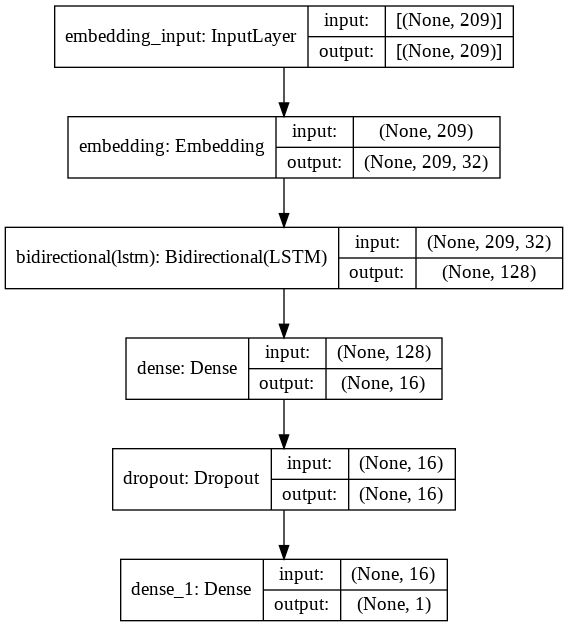

In [14]:

tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

**Step 12:**

We will fit our training and validating data into model now. 

In [15]:
history = model.fit(x_train_features, train_label, batch_size=512, epochs=20, 
                    validation_data=(x_valid_features, valid_label))
valid_predict = [1 if o>0.5 else 0 for o in model.predict(x_valid_features)]

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 0.6936 - accuracy: 0.6507 - val_loss: 0.6898 - val_accuracy: 0.7619
Epoch 2/20
1/1 [==============================] - 0s 108ms/step - loss: 0.6893 - accuracy: 0.7671 - val_loss: 0.6857 - val_accuracy: 0.7619
Epoch 3/20
1/1 [==============================] - 0s 79ms/step - loss: 0.6847 - accuracy: 0.7534 - val_loss: 0.6799 - val_accuracy: 0.7619
Epoch 4/20
1/1 [==============================] - 0s 90ms/step - loss: 0.6787 - accuracy: 0.7534 - val_loss: 0.6729 - val_accuracy: 0.7619
Epoch 5/20
1/1 [==============================] - 0s 78ms/step - loss: 0.6713 - accuracy: 0.7534 - val_loss: 0.6649 - val_accuracy: 0.7619
Epoch 6/20
1/1 [==============================] - 0s 80ms/step - loss: 0.6630 - accuracy: 0.7534 - val_loss: 0.6558 - val_accuracy: 0.7619
Epoch 7/20
1/1 [==============================] - 0s 83ms/step - loss: 0.6540 - accuracy: 0.7534 - val_loss: 0.6452 - val_accuracy: 0.7619
Epoch 8/20
1/1 [==========

**Step 13:**

Lets Plot ourselves an confusion matrix. For better understanding our loss and accuracy

**Step 14:**

Well after we have fitted the model. Theremaining work is only to check the 

Precision, Recall and F1 score.


---



**Precision** is a good measure to determine, when the costs of False Positive is high. 


Precision: 

 Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.


   In Phishing Email detection, a false positive means that an email that is non-phishing (actual negative) has been identified as phishing (predicted phsihng ). The email user might lose important emails if the precision is not high for the phishing detection model.



---


**Recall** actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). 


---


**F1 Score** might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [16]:
cf_matrix =confusion_matrix(valid_label,valid_predict)
tn, fp, fn, tp = confusion_matrix(valid_label,valid_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(valid_label, valid_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(valid_label, valid_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(valid_label,valid_predict)))

Precision: 94.12%
Recall: 100.00%
F1 Score: 96.97%


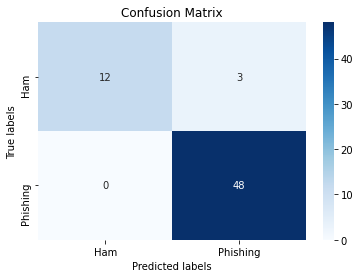

In [17]:
ax= plt.subplot()
#annot=True to annotate cells
cf_matrix =confusion_matrix(valid_label,valid_predict)
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Ham', 'Phishing']); ax.yaxis.set_ticklabels(['Ham', 'Phishing']);